# soynlp를 사용해 토큰화

## 텍스트 데이터 전처리 이해하기

(출처 : [트위터 한국어 형태소 분석기](https://github.com/twitter/twitter-korean-text))

**정규화 normalization (입니닼ㅋㅋ -> 입니다 ㅋㅋ, 샤릉해 -> 사랑해)**

* 한국어를 처리하는 예시입니닼ㅋㅋㅋㅋㅋ -> 한국어를 처리하는 예시입니다 ㅋㅋ

**토큰화 tokenization**

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하는Verb, 예시Noun, 입Adjective, 니다Eomi ㅋㅋKoreanParticle

**어근화 stemming (입니다 -> 이다)**

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하다Verb, 예시Noun, 이다Adjective, ㅋㅋKoreanParticle


**어구 추출 phrase extraction** 

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어, 처리, 예시, 처리하는 예시

Introductory Presentation: [Google Slides](https://docs.google.com/presentation/d/10CZj8ry03oCk_Jqw879HFELzOLjJZ0EOi4KJbtRSIeU/)

In [1]:
!pip install soynlp

In [2]:
!pip install gensim

In [3]:
from soynlp.tokenizer import RegexTokenizer
import pandas as pd
import warnings
warnings.simplefilter('ignore')

tokenizer = RegexTokenizer()
tokenizer

In [4]:
df = pd.read_csv('data/wordtovec.csv',index_col='article_id')
df

,content
article_id,
28,존경하옵는 문재인대통령님께 저는 중국원양자원이라는 KOSPI상장사의 소액 주...
32,존경하는 대통령님께 코스피 주식종목 중국 원양자원은 현재 계속되는 장 대표이사...
77,지장물관련 국토부의 해석 기존 건축물의 철거 공사에 관한 사항의 범위는 전기 ...
91,존경하는 문제인 대통령님께 먼저 어렵고 힘든 국정운영을 이끄시느라 노고가 많으십니다...
124,안녕하십니까 최근 뉴스에 주목을 못 받는 뉴스가 있습니다 아시아경제tv의 포스코...
...,...
491848,은행 업무 시간을 오후 시까지 연장해 직장인들도 편리하게 이용할 수 있도록 제안합...
491885,년이 지나면 월급의 정도를 국민연금보험료로 내야합니다 계산해보세요 여러...
491918,개미들 돈털어가는 역적 문재인 공매도세력 모두들 한국 증시 살리기위해 공매도 폐지하...


In [5]:
sentences =df.stack()

In [6]:
sentences

article_id         
28          content        존경하옵는 문재인대통령님께 저는 중국원양자원이라는 KOSPI상장사의 소액 주...
32          content    존경하는 대통령님께  코스피 주식종목 중국 원양자원은 현재 계속되는 장   대표이사...
77          content     지장물관련 국토부의 해석   기존 건축물의 철거 공사에 관한 사항의 범위는 전기 ...
91          content    존경하는 문제인 대통령님께 먼저 어렵고 힘든 국정운영을 이끄시느라 노고가 많으십니다...
124         content    안녕하십니까  최근 뉴스에 주목을 못 받는 뉴스가 있습니다  아시아경제tv의 포스코...
                                             ...                        
491848      content    은행 업무 시간을 오후  시까지 연장해 직장인들도 편리하게 이용할 수 있도록 제안합...
491885      content      년이 지나면 월급의    정도를  국민연금보험료로 내야합니다  계산해보세요 여러...
491918      content    개미들 돈털어가는 역적 문재인 공매도세력 모두들 한국 증시 살리기위해 공매도 폐지하...
491935      content    안녕하세요  여기는 베트남의 수도 하노이입니다  최근의 이곳 상황은 베트남 축구대표...
491998      content    부동산 새해 복 많이 받으세요 정말 고생 하시고 수고 많으세요 전 부동산 개발업  ...
Length: 19866, dtype: object

In [49]:
from konlpy.tag import Okt

In [51]:
#okt = Okt()

In [7]:
%time tokens = sentences.apply(tokenizer.tokenize) # % : 주피터에서만 사용 가능, 출력 시간 나타냄
tokens[:3]

Wall time: 18.7 s


article_id         
28          content    [존경하옵는, 문재인대통령님께, 저는, 중국원양자원이라는, KOSPI, 상장사의, ...
32          content    [존경하는, 대통령님께, 코스피, 주식종목, 중국, 원양자원은, 현재, 계속되는, ...
77          content    [지장물관련, 국토부의, 해석, 기존, 건축물의, 철거, 공사에, 관한, 사항의, ...
dtype: object

In [7]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

### word2vec parameter

1. vector_size ,size or Layer Size
- 벡터 차원 수
- 너무 작은 값이 아니라면, 학습의 경향이 달라지진 않는다. 적당히 큰 숫자면 충분하다.
(보통 논문이나, 실험에서는 100~300 값으로 설정해 사용하곤 한다.)

2. window
- window 는 훈련시 앞 뒤로 고려하는 단어의 개수 
   ex) “a little, (cat), sit, on”에서 "cat" 단어 기준 windows 는 2
- window 값이 커지면 단어의 학습 량이 증가 -> 계산량 증가, 단어의 의미적 정확도 증가

3. min count
- 최소 빈도수, 해당 빈도수보다 작게 등장한 단어의 경우 모델 학습에서 배제
- 값을 작게할 수록 몇번 안나온 단어들도 계산에 포함, 속도가 느려지고, 모델의 크기가 커진다
- 등장 빈도가 높은 단어는 높은 단어끼리 가깝고, 등장 빈도가 낮으면 낮은 단어끼리 가깝다

4. worker
- 모델을 만들때, 스레드 개수 지정
- 스레드가 많아질수록 모델 빌드 속도가 빨라진다.

5. sg.
- Skip-gram or CBOW
- gensim 에서는 sg 값으로 설정 가능 (1일 경우 skip-gram, 0일 경우 CBOW)
- dl4j 에서는 설정이 가능하나, negative sample 개수를 지정할 경우 알아서 지정되는듯 했다
- skip-gram : 해당 단어를 통해 주변단어를 예측
- CBOW : 주변 단어를 통해 해당 단어를 예측 -> 거의 사용 안함
- skip-gram의 경우 해당 단어의 업데이트양이 CBOW보다 많아 보통 skip-gram 이용

6. hs
- Hiehierarchical softmax or Negative sampling
- gensim의 경우 hs 값으로 설정 가능 (1일 경우 hierarchical softmax, 0일 경우 negative sampling)

- hierarchical softmax(이하 hs) 의 경우 전체 단어를 업데이트 하지 않고, 트리구조의 weigth 생성후 weight 업데이트

  - binary tree로 구성, log2(word_갯수) 만큼 업데이트
  
7. negative sample
- negative sampling 사용시 샘플링 할 단어의 갯수 지정, 보통 5~20 

- 각 단어별로 주변 window 단어와 해당 단어와 상관없는(negative) 단어 5개 (값을 5로 지정 했을 경우) 를 보고 해당 단어 및 주변 단어를 업데이트

- negative sample 값이 클수록 업데이트 해야하는 단어가 늘어나므로 계산 속도에 영향을 미침

- 본인은 구현할때 역시 데이터 사이즈에 따라 가변하게끔 사용했다 (2~5)


8. ns_exponent
- negative sampling 사용시 샘플링 비율 -> 0~1 사이 값을 가지고, 1은 빈도수에 비례해서, 0은 모든 단어 동일하게 랜덤하게 뽑는 형식 , 보통 0.75 로 설정해 사용

- 어떤 값으로 설정했을때, 결과가 좋은지에 대한 논문
  (ref. arxiv.org/abs/1804.04212)
- 값이 0.75 일 경우 결과가 좋은 경우가 많았으나, 수행하는 일에 따라 값을 조정해봐야 한다

9. CBOW mean
- CBOW 방법을 설정했을때 사용되는 parameter, cbow 방법 으로 벡터 생성시 주변 단어 벡터를 합산할지, 평균을 낼지에 대한 parameter

10. alpha
- 벡터 업데이트 시 learning rate (defalt 0.025)

11. min alpha
- min learning rate parameter, 학습이 진행 될수록 alpha 값이 min_alpha로 떨어진다. (default 0.0001)
- alpha - (alpha - min_alpha) * progress (progress는 0~ 1 사이 값)

12. seed
- 워드 벡터의 초기화를 위한 parameter, 단어+str(seed) 값을 해싱 -> 초기 단어 벡터 생성

13. hashfxn
- seed를 이용해 word를 해싱하는 함수가 os나 컴퓨터 사양에 영향을 받을 수 있으니, 사용자가 정의한 해쉬 함수를 사용하게끔 parameter 지정

14. max vocab size
- 벡터를 만들 단어 갯수를 제한 (빈도순으로)

- 저빈도 단어의 경우 모델에서 제외시키겠다는 의미

15. max final vocab
- 빈도 순 단어 내림차순 정렬 후 정렬된 단어중 max_final_vocab index 자리의 단어 빈도와 min_count중 큰 값을 min_count로 지정

- 한마디로 min count를 치환, 단어 마지노선을 상향하겠다는 의미

16. sample (sub-sample)
- 전체 데이터에서 많이 등장하는 단어는 그만큼 학습 기회가 많으므로 이런 학습량을 확률적인 방식으로 줄이기 위한 변수
- p(단어 w) = 1 - root(t / freq(단어 w)) t 는 사용자 정의 -> 0.00001 권장

17. iter or iteration
- 반복횟수, 전체 데이터를 몇번 반복해서 보고 업데이트 할건지에 대한 변수

18. trim rule
- 단어 제거 규칙 명시 parameter , 해당 규칙이 사용자에 의해 정의 되면 해당 규칙으로 단어를 제거
- gensim 기본 값으로 None( None = min_count 값 이하의 단어는 버리기)

19. sorted vocab
- 값이 1 인 경우 단어를 인덱싱 하기 전에 등장 빈도 내림차순으로 소팅한 뒤에 인덱싱

20. batch word or batch size
- 모델 구성시 한번에 읽을 단어수

- gensim의 경우, 기본값 10000. 10000이상 설정 불가능 (greater than 10000 cython will be truncated)
  (ref. www.programmersought.com/article/2792230175/)
  
21. compute loss
- 값이 True 이면 모델을 업데이트 하는 동안 손실계산 값을 저장

https://hoonzi-text.tistory.com/2

In [8]:
from gensim.models import word2vec
# 모델 학습
model = word2vec.Word2Vec(tokens, min_count=1)
model
# %time model = word2vec.Word2Vec(token, min_count=1)

In [9]:
model_name = 'wtobtest1'
model.save(model_name)

In [10]:
model.wv.key_to_index

{'수': 0,
 '있습니다': 1,
 '있는': 2,
 '그': 3,
 '이': 4,
 '년': 5,
 '합니다': 6,
 '하는': 7,
 '더': 8,
 '하고': 9,
 '대한': 10,
 '및': 11,
 '할': 12,
 '월': 13,
 '제': 14,
 '그리고': 15,
 '한': 16,
 '등': 17,
 '없는': 18,
 '저는': 19,
 '이런': 20,
 '것입니다': 21,
 '있다': 22,
 '일': 23,
 '왜': 24,
 '많은': 25,
 '위해': 26,
 '것은': 27,
 '것이': 28,
 '같은': 29,
 '없습니다': 30,
 '또한': 31,
 '다': 32,
 '지금': 33,
 '현재': 34,
 '제가': 35,
 '모든': 36,
 '하지만': 37,
 '때문에': 38,
 '것': 39,
 '정말': 40,
 '의': 41,
 '것이다': 42,
 '를': 43,
 '부동산': 44,
 '또': 45,
 '너무': 46,
 '한다': 47,
 '것을': 48,
 '전': 49,
 '위한': 50,
 '않고': 51,
 '돈을': 52,
 '그런데': 53,
 '다시': 54,
 '입니다': 55,
 '다른': 56,
 '많이': 57,
 '이렇게': 58,
 '조': 59,
 '하지': 60,
 '억': 61,
 '아니라': 62,
 '대해': 63,
 '을': 64,
 '생각합니다': 65,
 '에': 66,
 '대한민국': 67,
 '바랍니다': 68,
 '잘': 69,
 '공매도': 70,
 '경우': 71,
 '될': 72,
 '모두': 73,
 '아닌': 74,
 '후': 75,
 '통해': 76,
 '만원': 77,
 '큰': 78,
 '가': 79,
 '없이': 80,
 '이미': 81,
 '있고': 82,
 '국민의': 83,
 '문재인': 84,
 '아파트': 85,
 '어떻게': 86,
 '이상': 87,
 '만': 88,
 '하여': 89,
 '는': 90,
 '이를': 91,


In [11]:
len(model.wv.key_to_index)

578625

In [12]:
vocab = model.wv.key_to_index
sorted(vocab, key=vocab.get, reverse=True)[:30]

['살듯이',
 '밀렸으며',
 '못내며',
 '받는데서',
 '졸업에',
 '또지내야하네요',
 '써오면',
 '이러저러하다',
 '구하라니요',
 '애아빠와',
 '이제그만하시기를',
 '아는척하는것도',
 '심상정의원은',
 '노조왕국에가서',
 '회계처리로서',
 '회계처리를해야합니다',
 '시장성과',
 '앞으로있을',
 '주식선물거래는',
 '국제법을',
 '경제주식',
 '경제현장과',
 '애아빠재산요',
 '논평하지',
 '자가있습니다',
 'KNT',
 '범들에',
 '보이고있는데',
 '심보를',
 '받아가겠다는']

In [13]:
vocab.get('수') # = vocab['수']

0

In [14]:
vocab

{'수': 0,
 '있습니다': 1,
 '있는': 2,
 '그': 3,
 '이': 4,
 '년': 5,
 '합니다': 6,
 '하는': 7,
 '더': 8,
 '하고': 9,
 '대한': 10,
 '및': 11,
 '할': 12,
 '월': 13,
 '제': 14,
 '그리고': 15,
 '한': 16,
 '등': 17,
 '없는': 18,
 '저는': 19,
 '이런': 20,
 '것입니다': 21,
 '있다': 22,
 '일': 23,
 '왜': 24,
 '많은': 25,
 '위해': 26,
 '것은': 27,
 '것이': 28,
 '같은': 29,
 '없습니다': 30,
 '또한': 31,
 '다': 32,
 '지금': 33,
 '현재': 34,
 '제가': 35,
 '모든': 36,
 '하지만': 37,
 '때문에': 38,
 '것': 39,
 '정말': 40,
 '의': 41,
 '것이다': 42,
 '를': 43,
 '부동산': 44,
 '또': 45,
 '너무': 46,
 '한다': 47,
 '것을': 48,
 '전': 49,
 '위한': 50,
 '않고': 51,
 '돈을': 52,
 '그런데': 53,
 '다시': 54,
 '입니다': 55,
 '다른': 56,
 '많이': 57,
 '이렇게': 58,
 '조': 59,
 '하지': 60,
 '억': 61,
 '아니라': 62,
 '대해': 63,
 '을': 64,
 '생각합니다': 65,
 '에': 66,
 '대한민국': 67,
 '바랍니다': 68,
 '잘': 69,
 '공매도': 70,
 '경우': 71,
 '될': 72,
 '모두': 73,
 '아닌': 74,
 '후': 75,
 '통해': 76,
 '만원': 77,
 '큰': 78,
 '가': 79,
 '없이': 80,
 '이미': 81,
 '있고': 82,
 '국민의': 83,
 '문재인': 84,
 '아파트': 85,
 '어떻게': 86,
 '이상': 87,
 '만': 88,
 '하여': 89,
 '는': 90,
 '이를': 91,


In [15]:
# Counter로 자주 등장하는 단어 보기
from collections import Counter
dict(Counter(vocab).most_common(20))

{'살듯이': 578624,
 '밀렸으며': 578623,
 '못내며': 578622,
 '받는데서': 578621,
 '졸업에': 578620,
 '또지내야하네요': 578619,
 '써오면': 578618,
 '이러저러하다': 578617,
 '구하라니요': 578616,
 '애아빠와': 578615,
 '이제그만하시기를': 578614,
 '아는척하는것도': 578613,
 '심상정의원은': 578612,
 '노조왕국에가서': 578611,
 '회계처리로서': 578610,
 '회계처리를해야합니다': 578609,
 '시장성과': 578608,
 '앞으로있을': 578607,
 '주식선물거래는': 578606,
 '국제법을': 578605}

In [16]:
model.wv

In [17]:
min(vocab, key=vocab.get)

'수'

In [18]:
model.wv['문재인']

array([ 1.4343476 ,  0.40955508,  1.4275976 ,  1.2703058 ,  0.12506767,
       -1.4166541 , -0.68255126, -2.3725646 , -0.6485333 , -0.922035  ,
        2.4723203 , -3.9800248 ,  0.30489907, -0.5225838 ,  0.02735106,
       -3.8565898 , -2.1706245 , -3.6619713 , -0.8315861 , -0.6229429 ,
        0.10994367, -3.8276665 ,  1.0963119 , -2.8632236 , -1.6063896 ,
       -0.18707721,  0.3186806 ,  1.2168305 ,  2.593541  , -0.97287905,
       -4.599329  ,  0.825653  , -0.513893  , -0.04306084, -4.7300763 ,
       -0.13863443,  3.098113  , -1.3094782 , -7.0826764 ,  3.6259196 ,
        0.40406862, -1.5253493 ,  1.6140449 ,  0.2690489 ,  5.2325854 ,
       -0.83610827, -0.35947376, -7.474667  ,  3.388004  , -0.4566996 ,
       -1.6871855 ,  1.0522864 ,  1.8226696 ,  1.9094766 , -1.399112  ,
       -2.1459298 , -2.7372966 , -4.958602  ,  1.9274933 , -2.4577937 ,
        0.34778237, -0.15149893, -1.1131352 ,  1.2533319 ,  0.0339258 ,
        5.0240755 ,  1.6617731 , -0.8888917 ,  1.6766733 ,  1.02

In [19]:
model.wv.most_similar('주식')

[('코스닥', 0.8666379451751709),
 ('투자', 0.8625337481498718),
 ('외국인', 0.8495143055915833),
 ('기관', 0.824752688407898),
 ('대여는', 0.8233991265296936),
 ('주가', 0.8226878046989441),
 ('기관과', 0.8197582960128784),
 ('증권', 0.8185667991638184),
 ('선물', 0.8123903870582581),
 ('발행되아', 0.8101330995559692)]

In [20]:
model.wv.most_similar('코스닥')

[('주식시장', 0.9034779071807861),
 ('코스피', 0.9009219408035278),
 ('증시', 0.880096435546875),
 ('폭락', 0.877435028553009),
 ('주식', 0.8666379451751709),
 ('활성방안', 0.8659881353378296),
 ('활성화라는', 0.8581053018569946),
 ('연일', 0.8562131524085999),
 ('가상화폐', 0.8535777926445007),
 ('바이오', 0.8486457467079163)]

In [21]:
model.wv.most_similar('부동산')

[('집값', 0.8454152345657349),
 ('박의원', 0.8426543474197388),
 ('투기', 0.8412783145904541),
 ('관련의', 0.8310610055923462),
 ('빠져야', 0.8258973956108093),
 ('가격', 0.8234643936157227),
 ('냐니깐', 0.8231720328330994),
 ('투기조성자', 0.8219016790390015),
 ('상승을', 0.8116932511329651),
 ('잡겠다고', 0.8067828416824341)]

In [22]:
model.wv.doesnt_match('부동산 증권 현금 코스닥 코스피'.split())

'현금'

In [23]:
model.wv.most_similar('현금')

[('카드', 0.9275063872337341),
 ('금액', 0.9228293299674988),
 ('채무', 0.9207730889320374),
 ('금액의', 0.9180780053138733),
 ('이체', 0.9173860549926758),
 ('건물', 0.9169233441352844),
 ('저축은행에서', 0.9165778160095215),
 ('제외하고', 0.9151675701141357),
 ('예금', 0.9142112731933594),
 ('배당금을', 0.9132579565048218)]

In [24]:
model.wv.most_similar('공매도')

[('공매도를', 0.8690096735954285),
 ('외인만', 0.8578252196311951),
 ('무차입', 0.8369419574737549),
 ('공매도는', 0.8321458697319031),
 ('공매도가', 0.8272361159324646),
 ('옹호론자들은', 0.8260314464569092),
 ('공매수', 0.8161944150924683),
 ('주식', 0.7896828055381775),
 ('전유물인', 0.7851700782775879),
 ('선진국중', 0.7812826633453369)]

In [25]:
model.wv.most_similar(positive=['주식', '증권'], negative=['현금'])

[('코스닥', 0.81341153383255),
 ('주식시장', 0.8121479153633118),
 ('거래소', 0.805011510848999),
 ('대여는', 0.8018274307250977),
 ('기관', 0.7906447649002075),
 ('활성화방안', 0.7770018577575684),
 ('아웃', 0.7695947885513306),
 ('일부분이며', 0.764376699924469),
 ('공매도법', 0.7633718848228455),
 ('교란하는', 0.7620927691459656)]

In [26]:
model.wv.similarity('주식', '부동산')

0.6707872

In [27]:
model.wv.similarity('주식', '투자')

0.8625338

In [28]:
model.wv.similarity('주식', '증권')

0.81856674

In [29]:
model.wv.similarity('주식', '현금')

0.54746205

In [30]:
model.wv.similarity('삼성', '증권')

0.7468817

In [31]:
model.wv.similarity('주식', '공매도')

0.7896829

In [32]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import gensim 
import gensim.models as g

mpl.rcParams['font.family']='Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [33]:
model_name = 'wtobtest1'
# model = g.Doc2Vec.load(model_name)
model =g.Word2Vec.load(model_name)

t-SNE 분석을 각각 한번씩한 결과를 시각화 해서 표현한 결과 인데, 보는 것과 같이 군집에 대한 특성은 그대로 유지 되지만 값 자체는 변화가 된것

In [34]:
 list(model.wv.key_to_index)

['수',
 '있습니다',
 '있는',
 '그',
 '이',
 '년',
 '합니다',
 '하는',
 '더',
 '하고',
 '대한',
 '및',
 '할',
 '월',
 '제',
 '그리고',
 '한',
 '등',
 '없는',
 '저는',
 '이런',
 '것입니다',
 '있다',
 '일',
 '왜',
 '많은',
 '위해',
 '것은',
 '것이',
 '같은',
 '없습니다',
 '또한',
 '다',
 '지금',
 '현재',
 '제가',
 '모든',
 '하지만',
 '때문에',
 '것',
 '정말',
 '의',
 '것이다',
 '를',
 '부동산',
 '또',
 '너무',
 '한다',
 '것을',
 '전',
 '위한',
 '않고',
 '돈을',
 '그런데',
 '다시',
 '입니다',
 '다른',
 '많이',
 '이렇게',
 '조',
 '하지',
 '억',
 '아니라',
 '대해',
 '을',
 '생각합니다',
 '에',
 '대한민국',
 '바랍니다',
 '잘',
 '공매도',
 '경우',
 '될',
 '모두',
 '아닌',
 '후',
 '통해',
 '만원',
 '큰',
 '가',
 '없이',
 '이미',
 '있고',
 '국민의',
 '문재인',
 '아파트',
 '어떻게',
 '이상',
 '만',
 '하여',
 '는',
 '이를',
 '그러나',
 '정부가',
 '우리',
 '것으로',
 '가상화폐',
 '되는',
 '계속',
 '정부는',
 '그래서',
 '로',
 '국민',
 '되어',
 '알고',
 '됩니다',
 '정부',
 '이러한',
 '중',
 '또는',
 '없고',
 '같이',
 '때',
 '바로',
 '문제가',
 '않는',
 '해야',
 '가장',
 '없다',
 '주식',
 '않습니다',
 '안',
 '있도록',
 '결국',
 '된다',
 '정부의',
 '있다고',
 '있는데',
 '가지고',
 '당시',
 '하면',
 '주',
 '물론',
 '만들어',
 '해서',
 '받고',
 '피해를',
 '사람이',
 '제대로',
 '따라',
 'http

In [35]:
 model.wv['이를']

array([ 0.2862307 ,  2.2557216 , -0.32972237,  0.28685743,  3.880912  ,
       -1.6673417 ,  1.9544331 ,  7.224748  ,  0.01485622, -2.2536368 ,
        0.44016877, -5.4215913 ,  1.5624356 , -4.336818  , -1.1716197 ,
       -0.07961192, -0.12415703, -3.6055555 ,  0.76908135, -2.747582  ,
        3.4155085 ,  0.4448193 ,  0.63082224,  0.06336756, -1.3331326 ,
       -1.8863214 ,  1.8537326 ,  1.1458657 , -1.1616516 , -4.524954  ,
       -1.7908456 , -1.8435112 ,  2.9059844 , -3.1412024 , -2.6365952 ,
       -5.165112  ,  3.294392  ,  2.2170177 , -0.08706   ,  2.7251863 ,
        4.305515  , -0.3507155 , -2.5515192 , -0.16041751,  3.7120237 ,
        3.541391  , -1.3137137 , -1.4787328 , -0.14634748,  4.108759  ,
        0.925255  ,  1.0519328 ,  3.0948303 , -2.2160316 , -1.5028784 ,
        0.3736296 , -0.282294  ,  0.16167794, -3.917308  ,  2.1595008 ,
       -1.0507277 , -0.5572446 ,  0.00729867,  0.11720648, -2.5397928 ,
        1.6142621 , -0.36581722, -0.14021422,  1.4297317 ,  3.07

In [36]:
vocab

{'수': 0,
 '있습니다': 1,
 '있는': 2,
 '그': 3,
 '이': 4,
 '년': 5,
 '합니다': 6,
 '하는': 7,
 '더': 8,
 '하고': 9,
 '대한': 10,
 '및': 11,
 '할': 12,
 '월': 13,
 '제': 14,
 '그리고': 15,
 '한': 16,
 '등': 17,
 '없는': 18,
 '저는': 19,
 '이런': 20,
 '것입니다': 21,
 '있다': 22,
 '일': 23,
 '왜': 24,
 '많은': 25,
 '위해': 26,
 '것은': 27,
 '것이': 28,
 '같은': 29,
 '없습니다': 30,
 '또한': 31,
 '다': 32,
 '지금': 33,
 '현재': 34,
 '제가': 35,
 '모든': 36,
 '하지만': 37,
 '때문에': 38,
 '것': 39,
 '정말': 40,
 '의': 41,
 '것이다': 42,
 '를': 43,
 '부동산': 44,
 '또': 45,
 '너무': 46,
 '한다': 47,
 '것을': 48,
 '전': 49,
 '위한': 50,
 '않고': 51,
 '돈을': 52,
 '그런데': 53,
 '다시': 54,
 '입니다': 55,
 '다른': 56,
 '많이': 57,
 '이렇게': 58,
 '조': 59,
 '하지': 60,
 '억': 61,
 '아니라': 62,
 '대해': 63,
 '을': 64,
 '생각합니다': 65,
 '에': 66,
 '대한민국': 67,
 '바랍니다': 68,
 '잘': 69,
 '공매도': 70,
 '경우': 71,
 '될': 72,
 '모두': 73,
 '아닌': 74,
 '후': 75,
 '통해': 76,
 '만원': 77,
 '큰': 78,
 '가': 79,
 '없이': 80,
 '이미': 81,
 '있고': 82,
 '국민의': 83,
 '문재인': 84,
 '아파트': 85,
 '어떻게': 86,
 '이상': 87,
 '만': 88,
 '하여': 89,
 '는': 90,
 '이를': 91,


In [37]:
X = model.wv[vocab]
X

array([[ 1.03033340e+00,  2.50209141e+00,  1.05184317e+00, ...,
        -3.40004897e+00,  9.79072392e-01,  2.26865625e+00],
       [-1.82337844e+00,  2.70638776e+00,  2.82046509e+00, ...,
         8.26269984e-01, -1.62791371e+00, -1.26780641e+00],
       [ 3.21984500e-01,  2.83316612e+00, -2.81244111e+00, ...,
         2.28769994e+00,  6.53872156e+00, -7.94113040e-01],
       ...,
       [ 1.79890282e-02,  1.80404331e-03,  2.79368423e-02, ...,
         6.51802123e-03,  1.75775681e-02,  1.71810891e-02],
       [ 2.21280586e-02,  8.46400298e-03,  1.49457315e-02, ...,
         1.42174438e-02,  8.86413921e-03,  1.84137784e-02],
       [-5.74359344e-03, -1.28591405e-02,  8.29874258e-03, ...,
         1.07384501e-02, -2.16470677e-02,  3.63139212e-02]], dtype=float32)

In [38]:
vocab = list(model.wv.key_to_index)
X = model.wv[vocab]
print('Feature의 길이 {}'.format(len(X)))
print(X[0][:10])
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform( X[:150,:] )

Feature의 길이 578625
[ 1.0303334   2.5020914   1.0518432   4.818852   -0.40672266 -4.3271565
  4.16222     7.2414293  -1.491761   -3.7182722 ]


In [39]:
X_tsne.shape

(150, 2)

In [40]:
df = pd.DataFrame(X_tsne, index=vocab[:150], columns=['x', 'y'])
df.shape

(150, 2)

In [41]:
df

,x,y
수,7.390048,-0.151758
있습니다,7.013511,-9.084299
있는,7.293159,-7.590778
그,-5.226646,0.088075
이,-6.910836,-6.230093
...,...,...
원,1.611181,4.980357
전혀,-3.242885,2.722372
경제,-1.334332,-8.420704
그렇게,-0.918137,-2.481898


In [42]:
import warnings
warnings.simplefilter('ignore')

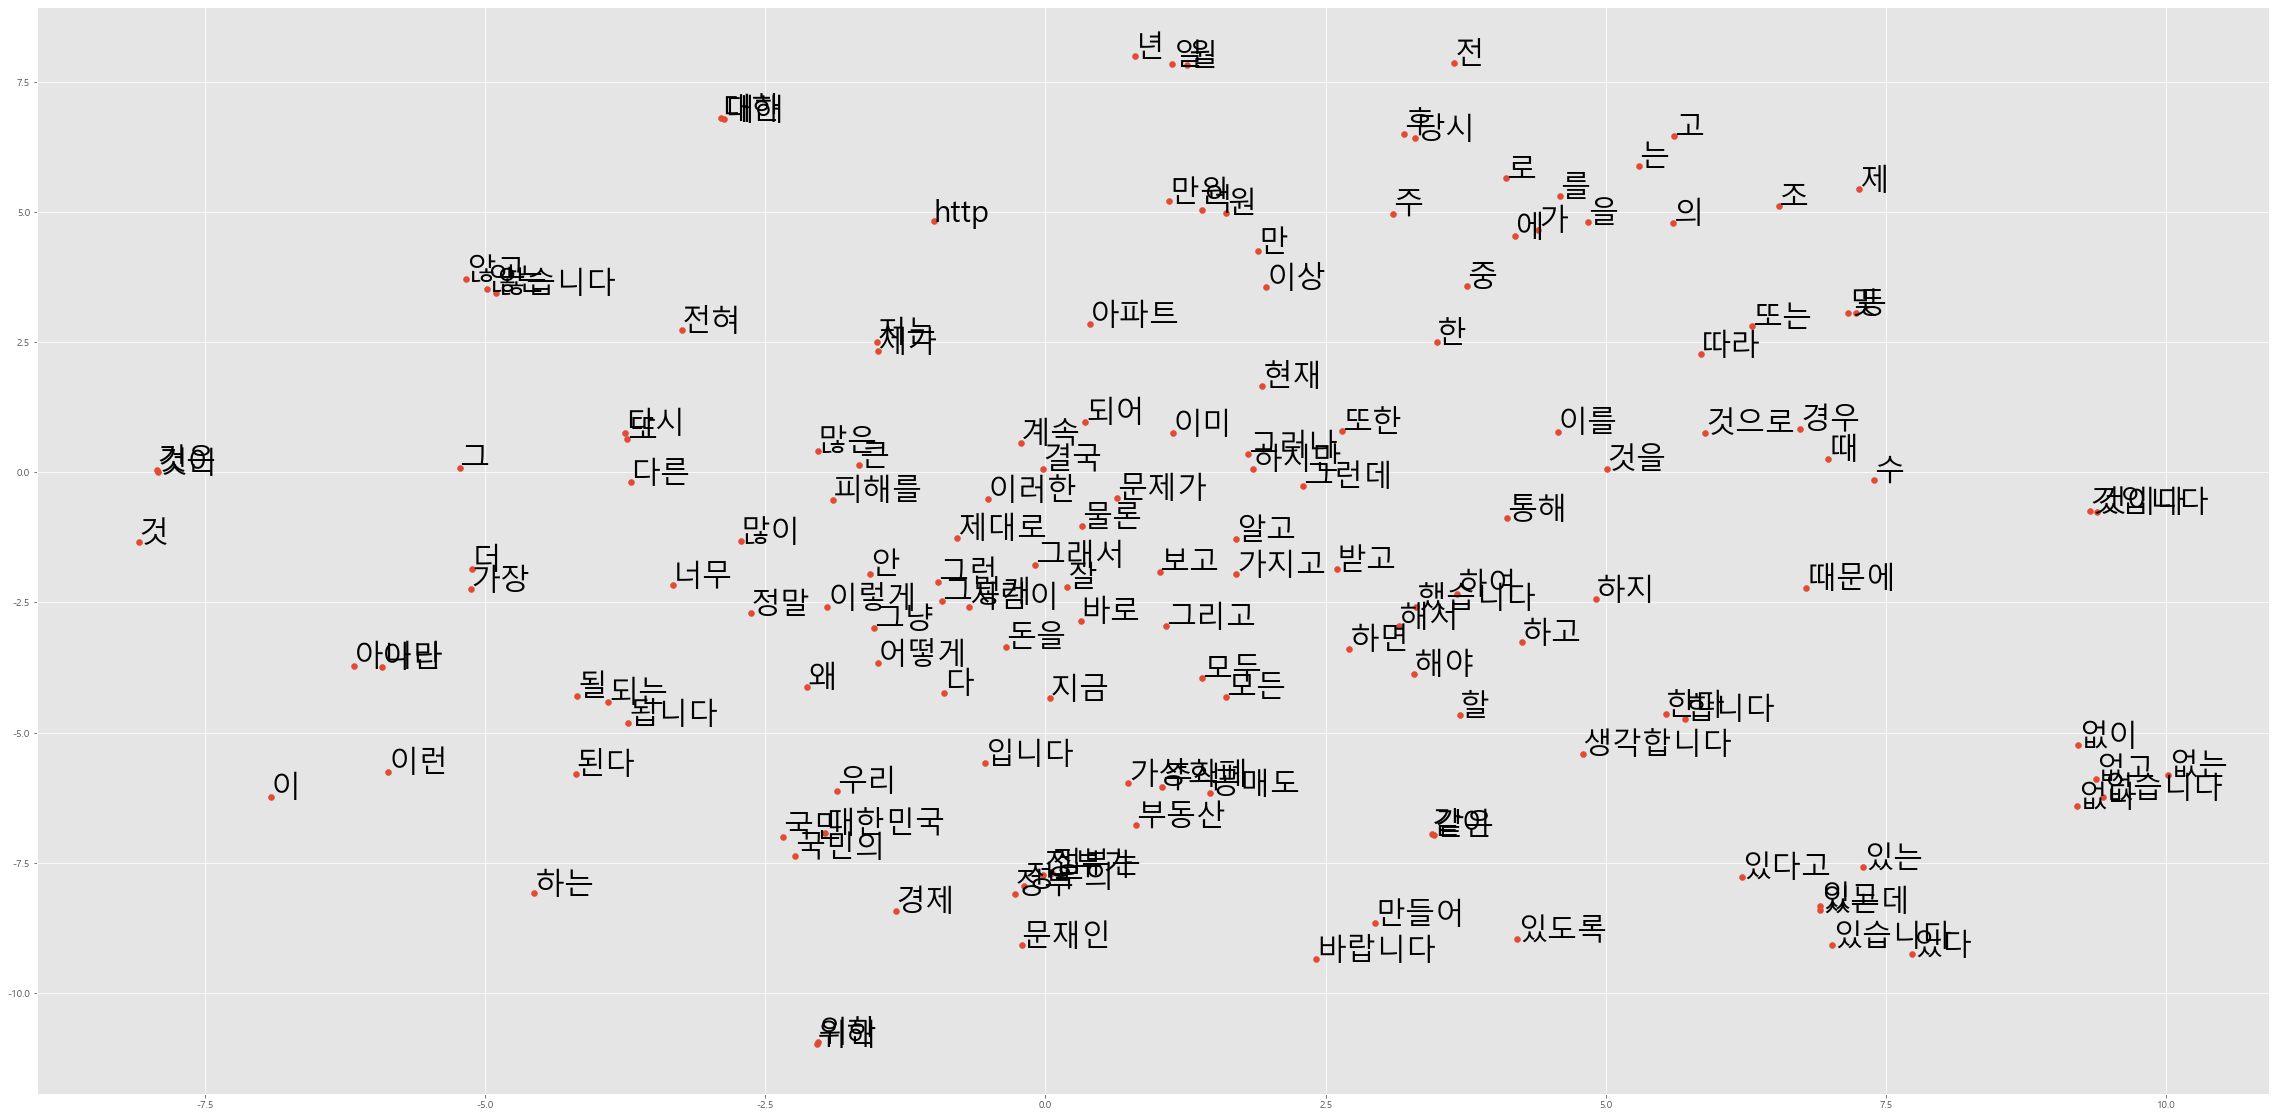

In [43]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [1]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
import math

In [2]:
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [3]:
s1= '저는 사과 좋아요'
s2= '저는 오렌지 좋아요'
s3= '저는 오렌지 좋아요 저는 오렌지 좋아요'

In [6]:
voc = ['오렌지', '사과','저는','좋아요']

In [4]:
doc1=np.array([0,1,1,1])
doc2=np.array([1,0,1,1])
doc3=np.array([2,0,2,2])

In [5]:
print(cos_sim(doc1, doc2)) #문서1과 문서2의 코사인 유사도
print(cos_sim(doc1, doc3)) #문서1과 문서3의 코사인 유사도
print(cos_sim(doc2, doc3)) #문서2과 문서3의 코사인 유사도

0.6666666666666667
0.6666666666666667
1.0000000000000002


In [7]:
import pandas as pd
countvect_df = pd.DataFrame([doc1,doc2,doc3], columns = voc)
countvect_df

,오렌지,사과,저는,좋아요
0,0,1,1,1
1,1,0,1,1
2,2,0,2,2


In [8]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(countvect_df, countvect_df)

array([[1.        , 0.66666667, 0.66666667],
       [0.66666667, 1.        , 1.        ],
       [0.66666667, 1.        , 1.        ]])

<h3>유클리드거리</h3>
<img src="eu.png">

In [48]:
import numpy as np
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))

print(dist(doc1,docQ))
print(dist(doc2,docQ))
print(dist(doc3,docQ))

2.23606797749979
3.1622776601683795
2.449489742783178
